# Distance Between Points - 2D
In the first exercise, we were able to visualize the dataset and estimate the k nearest neighbors of an unknown point. But a computer isn’t going to be able to do that!

We need to define what it means for two points to be close together or far apart. To do this, we’re going to use the Distance Formula.

For this example, the data has two dimensions:

* The length of the movie
* The movie’s release date
Consider Star Wars and Raiders of the Lost Ark. Star Wars is 125 minutes long and was released in 1977. Raiders of the Lost Ark is 115 minutes long and was released in 1981.

The distance between the movies is computed below:
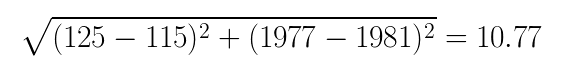

In [1]:
#Example

star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):

  length_difference = (movie1[0] - movie2[0]) ** 2
  year_difference = (movie1[1] - movie2[1]) ** 2

  distance = (length_difference + year_difference) ** 0.5

  return distance




print('distance between Star Wars and Raiders of the Lost Ark: ', distance(star_wars, raiders))
print('distance between Star Wars and Mean Girls: ', distance(star_wars, mean_girls))

distance between Star Wars and Raiders of the Lost Ark:  10.770329614269007
distance between Star Wars and Mean Girls:  38.897300677553446


# Distance Between Points - 3D
aking a movie rating predictor based on just the length and release date of movies is pretty limited. There are so many more interesting pieces of data about movies that we could use! So let’s add another dimension.

Let’s say this third dimension is the movie’s budget. We now have to find the distance between these two points in three dimensions.

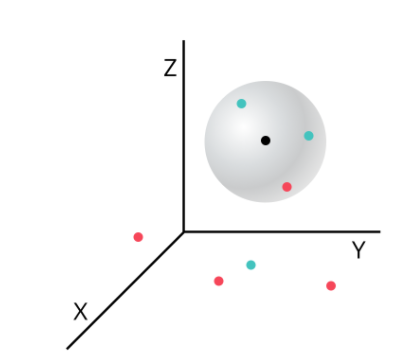

What if we’re not happy with just three dimensions? Unfortunately, it becomes pretty difficult to visualize points in dimensions higher than 3. But that doesn’t mean we can’t find the distance between them.

The generalized distance formula between points A and B is as follows:

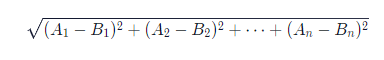

Here, A1-B1 is the difference between the first feature of each point. An-Bn is the difference between the last feature of each point.

Using this formula, we can find the K-Nearest Neighbors of a point in N-dimensional space! We now can use as much information about our movies as we want.

We will eventually use these distances to find the nearest neighbors to an unlabeled point.

In [3]:
star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
    total_distance = squared_difference ** 0.5

  return total_distance
print('distance between Star Wars and Raiders of the Lost Ark:' ,distance(star_wars,raiders) )
print('distance between Star Wars and Mean Girls:' ,distance(star_wars,mean_girls) )

distance between Star Wars and Raiders of the Lost Ark: 7000000.000008286
distance between Star Wars and Mean Girls: 6000000.000126083


# Data with Different Scales: Normalization

When we added the dimension of budget, you might have realized there are some problems with the way our data currently looks.

Consider the two dimensions of release date and budget. The maximum difference between two movies’ release dates is about 125 years (The Lumière Brothers were making movies in the 1890s). However, the difference between two movies’ budget can be millions of dollars.

The problem is that the distance formula treats all dimensions equally, regardless of their scale. If two movies came out 70 years apart, that should be a pretty big deal. However, right now, that’s exactly equivalent to two movies that have a difference in budget of 70 dollars. The difference in one year is exactly equal to the difference in one dollar of budget. That’s absurd!

Another way of thinking about this is that the budget completely outweighs the importance of all other dimensions because it is on such a huge scale. The fact that two movies were 70 years apart is essentially meaningless compared to the difference in millions in the other dimension.

The solution to this problem is to normalize the data so every value is between 0 and 1. In this lesson, we’re going to be using min-max normalization.

In [5]:
release_dates = [1897, 1998, 2000, 1948, 1962, 1950, 1975, 1960, 2017, 1937, 1968, 1996, 1944, 1891, 1995, 1948, 2011, 1965, 1891, 1978]


def min_max_normalize(normalized):
  minimum = min(normalized)
  maximum = max(normalized)
  for i , val in enumerate(normalized):
    normalized[i] = (val-minimum)/(maximum-minimum)
  return normalized


print(min_max_normalize(release_dates))
print(min_max_normalize(release_dates)[0])

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]
0.047619047619047616


# Using sklearn

You’ve now written your own K-Nearest Neighbor classifier from scratch! However, rather than writing your own classifier every time, you can use Python’s sklearn library. sklearn is a Python library specifically used for Machine Learning. It has an amazing number of features, but for now, we’re only going to investigate its K-Nearest Neighbor classifier.

There are a couple of steps we’ll need to go through in order to use the library. First, you need to create a KNeighborsClassifier object. This object takes one parameter - k. For example, the code below will create a classifier where k = 3

In [15]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

Next, we’ll need to train our classifier. The .fit() method takes two parameters. The first is a list of points, and the second is the labels associated with those points. So for our movie example, we might have something like this

In [16]:
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
 
training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

c:\users\rebec\pycharmprojects\venv\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Finally, after training the model, we can classify new points. The .predict() method takes a list of points that you want to classify. It returns a list of its guesses for those points.

In [18]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
 
guesses = classifier.predict(unknown_points)
print(guesses)

[1 1 1]


c:\users\rebec\pycharmprojects\venv\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


#  K-Nearest Neighbor regression model

We first need to create the regressor. We can use the parameter n_neighbors to define our value for k.

We can also choose whether or not to use a weighted average using the parameter weights. If weights equals "uniform", all neighbors will be considered equally in the average. If weights equals "distance", then a weighted average is used.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

Next, we need to fit the model to our training data using the .fit() method. .fit() takes two parameters. The first is a list of points, and the second is a list of values associated with those points.

In [20]:
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
 
training_labels = [5.0, 6.8, 9.0]
classifier.fit(training_points, training_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

Finally, we can make predictions on new data points using the .predict() method. .predict() takes a list of points and returns a list of predictions for those points.

In [22]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
 
guesses = classifier.predict(unknown_points)
print(guesses)

[7.28143288 7.76451922 6.8457845 ]


c:\users\rebec\pycharmprojects\venv\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
